# Ollama

[Ollama](https://ollama.ai/) allows you to run open-source large language models, such as Llama 2, locally.

Ollama bundles model weights, configuration, and data into a single package, defined by a Modelfile. 

It optimizes setup and configuration details, including GPU usage.

For a complete list of supported models and model variants, see the [Ollama model library](https://github.com/jmorganca/ollama#model-library).

## Setup

First, follow [these instructions](https://github.com/jmorganca/ollama) to set up and run a local Ollama instance:

* [Download](https://ollama.ai/download)
* Fetch a model via `ollama pull <model family>`
* e.g., for `Llama-7b`: `ollama pull llama2` (see full list [here](https://ollama.ai/library)
* This will download the most basic version of the model typically (e.g., smallest # parameters)
* On Mac, it will download to 

`~/.ollama/models/manifests/registry.ollama.ai/library/<model family>/latest`

* And we specify a particular version, e.g., for `ollama pull vicuna:13b-v1.5-16k-q4_0`
* The file is here with the model version in place of `latest`

`~/.ollama/models/manifests/registry.ollama.ai/library/vicuna/13b-v1.5-16k-q4_0`

You can easily access models in a few ways:

1/ if the app is running:

* All of your local models are automatically served on `localhost:11434`
* Select your model when setting `llm = Ollama(..., model="<model family>:<version>")`
* If you set `llm = Ollama(..., model="<model family")` withoout a version it will simply look for `latest`

2/ if building from source or just running the binary: 

* Then you must run `ollama serve`
* All of your local models are automatically served on `localhost:11434`
* Then, select as shown above


## Usage

You can see a full list of supported parameters on the [API reference page](https://api.python.langchain.com/en/latest/llms/langchain.llms.ollama.Ollama.html).

In [1]:
from langchain.callbacks.manager import CallbackManager
from langchain.callbacks.streaming_stdout import StreamingStdOutCallbackHandler
from langchain_community.llms import Ollama

llm = Ollama(model="llama2")

Optionally, pass `StreamingStdOutCallbackHandler` to stream tokens:

```
llm = Ollama(
    model="llama2",
    callback_manager=CallbackManager([StreamingStdOutCallbackHandler()]),
)
```

In [2]:
llm("Tell me about the history of AI")

' Artificial intelligence (AI) has a rich and varied history that spans several decades. październik 1950s and has evolved significantly over time. Here is a brief overview of the major milestones in the history of AI:\n\n1. 1950s: The Dartmouth Conference - Considered the birthplace of AI, this conference brought together computer scientists, mathematicians, and cognitive scientists to discuss the possibilities of creating machines that could simulate human intelligence. Attendees included John McCarthy, Marvin Minsky, Nathaniel Rochester, and Claude Shannon.\n2. 1951: The Turing Test - Alan Turing proposed a test to measure a machine\'s ability to exhibit intelligent behavior equivalent to, or indistinguishable from, that of a human. The Turing Test has since become a benchmark for measuring the success of AI systems.\n3. 1956: The First AI Program - John McCarthy created the first AI program, called the Logical Theorist, which was designed to reason and solve problems using logical 

## Multi-modal

Ollama has support for multi-modal LLMs, such as [bakllava](https://ollama.ai/library/bakllava) and [llava](https://ollama.ai/library/llava).

```
ollama pull bakllava
```

Be sure to update Ollama so that you have the most recent version to support multi-modal.

In [1]:
from langchain_community.llms import Ollama

bakllava = Ollama(model="bakllava")


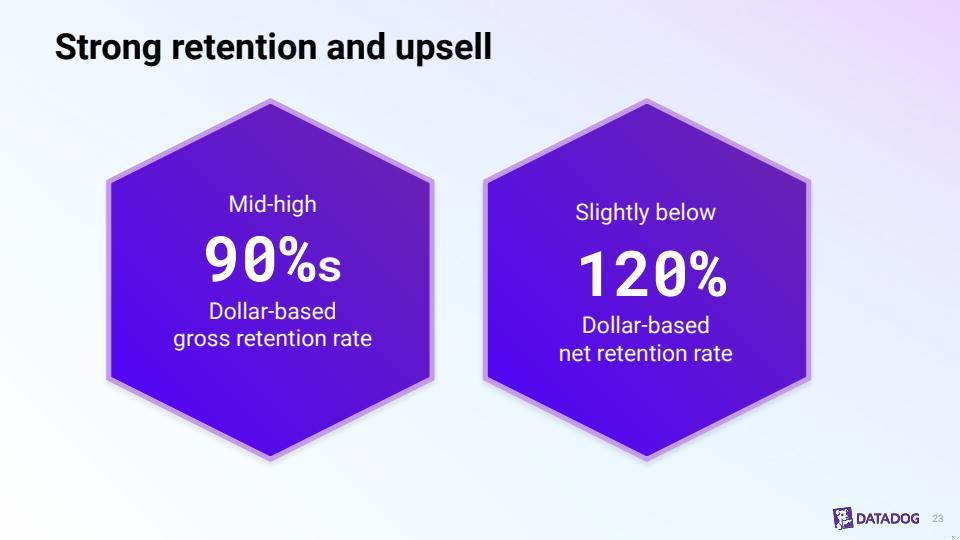

In [2]:
import base64
from io import BytesIO

from IPython.display import HTML, display
from PIL import Image


def convert_to_base64(pil_image):
    """
    Convert PIL images to Base64 encoded strings

    :param pil_image: PIL image
    :return: Re-sized Base64 string
    """

    buffered = BytesIO()
    pil_image.save(buffered, format="JPEG")  # You can change the format if needed
    img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
    return img_str


def plt_img_base64(img_base64):
    """
    Disply base64 encoded string as image

    :param img_base64:  Base64 string
    """
    # Create an HTML img tag with the base64 string as the source
    image_html = f'<img src="data:image/jpeg;base64,{img_base64}" />'
    # Display the image by rendering the HTML
    display(HTML(image_html))


file_path = "/Users/rlm/Desktop/Eval_Sets/multi_modal_presentations/DDOG/img_23.jpg"
pil_image = Image.open(file_path)
image_b64 = convert_to_base64(pil_image)
plt_img_base64(image_b64)

In [5]:
llm_with_image_context = bakllava.bind(images=[image_b64])
llm_with_image_context.invoke("What is the dollar based gross retention rate:")

'90%'